## Problem Statement: Predict Iris Species ( Setosa, versicolor or virginica ) from Sepal length/width and Petal length/width



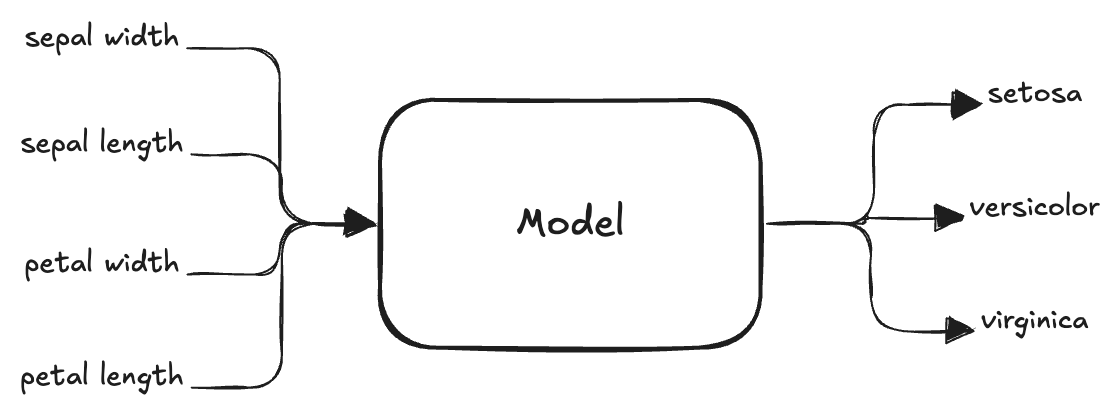

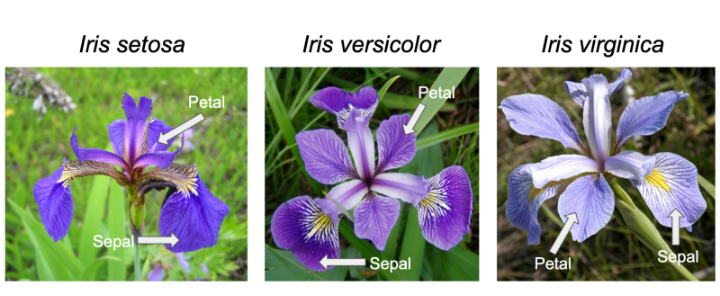

In [6]:
from IPython.display import Image, display

display(Image(filename="../images/iris_io.png"))
display(Image(filename="../images/iris.png"))

Lets read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('../dataset/iris.csv')
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(f'we have {len(df)} data points')

we have 150 data points


####  Lets Define our model

In [9]:
import torch
import torch.nn as nn

class SimpleMLP(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.net = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 3)
        )

    def forward(self, x):
        return self.net(x)

Prepare the dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Extract features and target
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
labels = df['Species'].values

# Encode labels to integers
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Split dataset into train and test (let's use 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# Convert to torch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

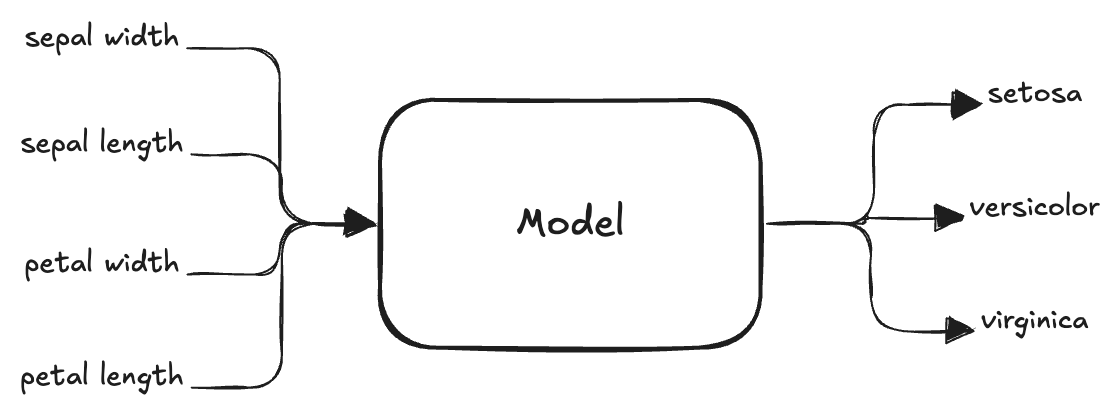

(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))

In [12]:
display(Image(filename="../images/iris_io.png"))

# each row of x_train contains 4 numbers which correspond to Sepal Length/Width and Petal Length/Width
# each row y_train contains a single number where 0=setosa, 1=versicolor and 2=virginica
next(zip(x_train, y_train))

In [13]:
model = SimpleMLP()
logits = model(x_train[0])
f_loss = nn.CrossEntropyLoss()
f_loss(logits, y_train[0])

tensor(0.5437, grad_fn=<NllLossBackward0>)

## training loop

In [14]:
model = SimpleMLP()
f_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

def accuracy(model, x, y):
    model.eval()
    with torch.no_grad():
        logits = model(x)
        preds = logits.argmax(dim=1)
        return (preds == y).float().mean().item()

losses = []
acc = []
import time

for epoch in range(200):
    model.train()
    optimizer.zero_grad()

    # forward ------------>
    logits = model(x_train)        # shape: (N, 3)
    loss = f_loss(logits, y_train) # y shape: (N,)

    # <----------- backward
    loss.backward()
    optimizer.step()


    if epoch % 10 == 0:
        acc.append(accuracy(model, x_test, y_test))
        losses.append(loss.item())
        time.sleep(0.5)

        print(loss.item())


tensor([[-1.8849,  0.3340, -0.4996],
        [-2.6536,  0.4540, -0.0321],
        [-3.1613,  0.5104, -0.2928],
        [-2.0384,  0.3720, -0.5478],
        [-2.6501,  0.4191, -0.2272],
        [-3.1024,  0.4639, -0.1304],
        [-2.7418,  0.4666, -0.2240],
        [-3.1099,  0.5423, -0.1607],
        [-3.7713,  0.5959, -0.1493],
        [-4.0128,  0.7863, -0.0676],
        [-3.8074,  0.6578, -0.0447],
        [-2.9552,  0.5074, -0.2268],
        [-2.3104,  0.3205, -0.2311],
        [-2.7241,  0.4700, -0.2940],
        [-2.7236,  0.4348, -0.2829],
        [-2.0411,  0.3933, -0.5245],
        [-2.2636,  0.4895, -0.5698],
        [-3.3178,  0.5371, -0.0550],
        [-3.3063,  0.6092, -0.0920],
        [-2.2745,  0.4522, -0.5624],
        [-3.0198,  0.4760, -0.1836],
        [-2.2570,  0.4861, -0.5764],
        [-3.9736,  0.7644, -0.1744],
        [-2.0732,  0.3748, -0.5359],
        [-2.5343,  0.3923, -0.2934],
        [-3.2648,  0.5895, -0.0451],
        [-3.2102,  0.5205, -0.1128],
 

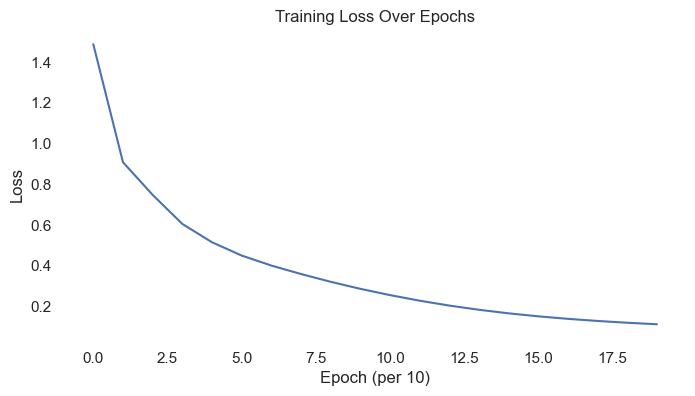

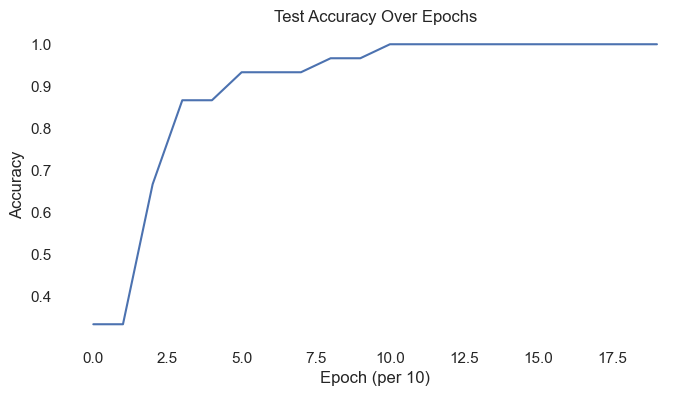

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", rc={"axes.facecolor": (0, 0, 0, 0)})

# Plot Loss
plt.figure(figsize=(8, 4), facecolor="none")  # transparent figure background
sns.lineplot(x=range(len(losses)), y=losses)
plt.xlabel('Epoch (per 10)')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.gcf().patch.set_alpha(0.0)   # transparent figure background
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 4), facecolor="none")  # transparent figure background
sns.lineplot(x=range(len(acc)), y=acc)
plt.xlabel('Epoch (per 10)')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.gcf().patch.set_alpha(0.0)   # transparent figure background
plt.show()

We trained a model with over 98% accuracy on predicting Iris Species